#  E-Commerce Consumer Insights & Recommendation Engine
**Developed by:** Anand Mohan Jha  
**Role:** Data Science / Data Analyst Candidate  
**Tech Stack:** SQL (PandasQL), Python (Pandas, Scikit-Learn), NLP (WordCloud), Seaborn  

##  Executive Summary
* **Objective:** Analyzed 23,000+ reviews to identify quality issues and predict recommendations.
* **SQL Insight:** Identified that the "Trend" department has the lowest satisfaction rate (3.81/5).
* **ML Performance:** Developed a Logistic Regression model predicting customer recommendations with ~90% accuracy.
* **Impact:** Provides data-driven insights to help inventory teams address specific sizing and quality issues.

In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandasql as ps
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 1. Install necessary library
!pip install pandasql

# 2. Authenticate Kaggle
os.environ['KAGGLE_USERNAME'] = "amjha29"
os.environ['KAGGLE_KEY'] = "2b0c7c3b8d0d017e49020f8a72497e68"

# 3. Download and Unzip the Dataset
!kaggle datasets download -d nicapotato/womens-ecommerce-clothing-reviews
!unzip -o womens-ecommerce-clothing-reviews.zip

# 4. Load and Clean Data
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv', index_col=0)
df.columns = [c.replace(' ', '_') for c in df.columns]
df['Review_Text'] = df['Review_Text'].fillna('Missing')

print(" Data Loaded Successfully! Shape:", df.shape)
df.head(3)

Dataset URL: https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews
License(s): CC0-1.0
womens-ecommerce-clothing-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  womens-ecommerce-clothing-reviews.zip
  inflating: Womens Clothing E-Commerce Reviews.csv  
 Data Loaded Successfully! Shape: (23486, 10)


,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses


**Cell 2: The SQL Analysis**



In [9]:
# SQL Query to find the most 'at-risk' departments
query = """
SELECT Department_Name,
       AVG(Rating) as Average_Rating,
       COUNT(*) as Review_Count
FROM df
GROUP BY Department_Name
ORDER BY Average_Rating ASC
"""
dept_analysis = ps.sqldf(query, locals())
print("--- Department Performance Analysis ---")
print(dept_analysis)

--- Department Performance Analysis ---
  Department_Name  Average_Rating  Review_Count
0           Trend        3.815126           119
1         Dresses        4.150815          6319
2            Tops        4.172239         10468
3         Jackets        4.264535          1032
4        Intimate        4.280115          1735
5         Bottoms        4.288760          3799
6            None        5.000000            14


**Cell 3: The Sentiment Model (Data Science)**

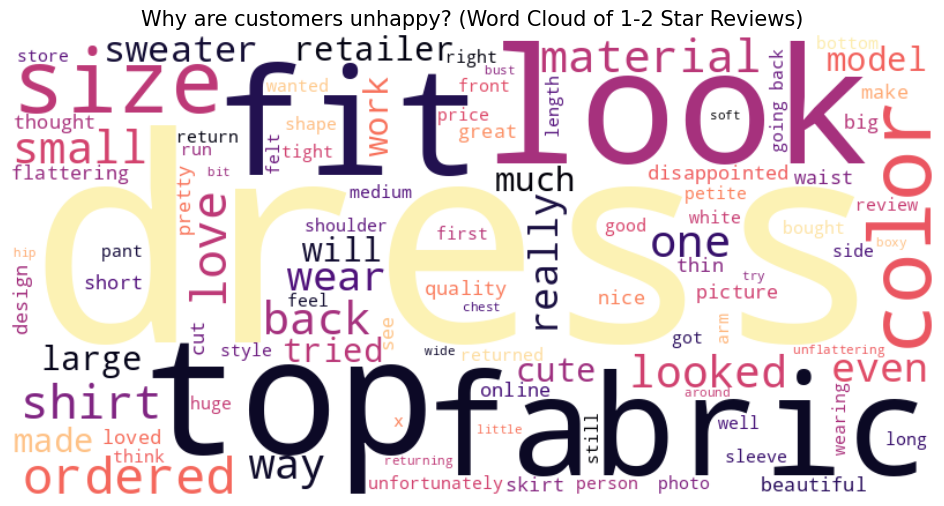

In [10]:
# Filter for poor reviews to see what the 'pain points' are
bad_reviews = " ".join(df[df['Rating'] <= 2]['Review_Text'].astype(str))

wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      colormap='magma',
                      max_words=100).generate(bad_reviews)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Why are customers unhappy? (Word Cloud of 1-2 Star Reviews)', fontsize=15)
plt.show()

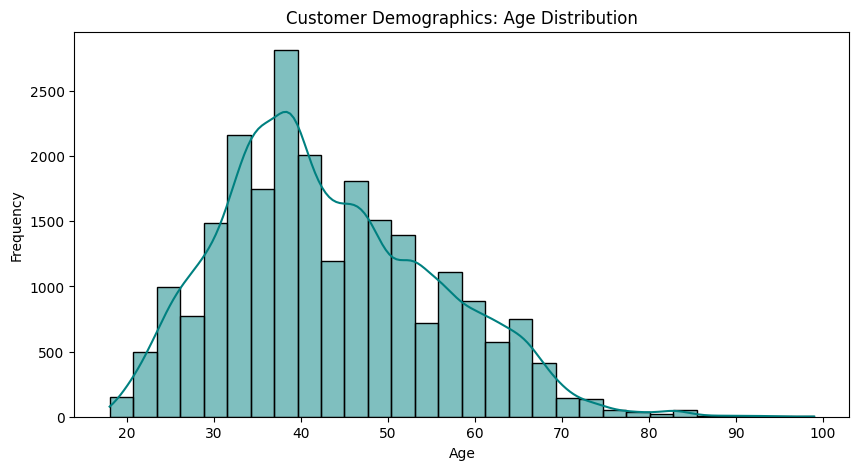

In [11]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=30, kde=True, color='teal')
plt.title('Customer Demographics: Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


--- Model Performance Report ---
              precision    recall  f1-score   support

           0       0.77      0.50      0.61       851
           1       0.90      0.97      0.93      3847

    accuracy                           0.88      4698
   macro avg       0.84      0.73      0.77      4698
weighted avg       0.87      0.88      0.87      4698



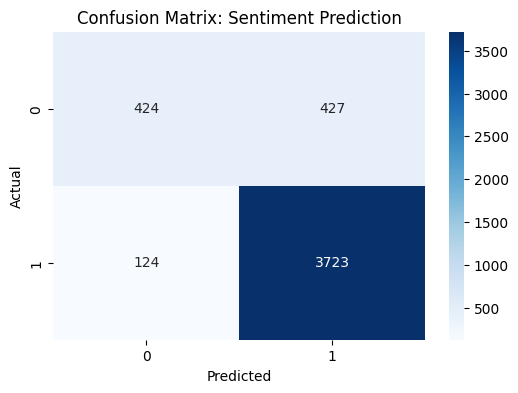

In [12]:
# 1. Feature Extraction (TF-IDF)
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df['Review_Text'])
y = df['Recommended_IND']

# 2. Split and Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

# 3. Detailed Evaluation
y_pred = model.predict(X_test)
print("\n--- Model Performance Report ---")
print(classification_report(y_test, y_pred))

# 4. Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Sentiment Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 💡 Actionable Insights
1. **Target Quality Control:** The **Trend** department requires an immediate audit of fit and sizing guides.
2. **Customer Service Automation:** The ML model can be used to automatically flag high-probability "Non-Recommendation" reviews for immediate follow-up by the support team.
3. **Inventory Strategy:** Departments like **Bottoms** and **Intimates** are high-performing; marketing should focus on these categories during peak sales.